<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Red_Neuronal_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy
import pandas as pd
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [12]:

x= df[[ 'PP_Las Varas AgriculturaCba', 'PP_San Miguel - Establecimiento Don Luis',
        'PP_ San Miguel - Las Varillas']]
y= df["PP_Alicia AgriculturaCba"]

In [13]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
#Estandarizo las features, las redes son muy sensibles a datos no escalados.
scaler_labels = StandardScaler()
x_train = scaler_labels.fit_transform(x_train)
x_test = scaler_labels.transform(x_test)

In [16]:
# Introducing the stars
import tensorflow as tf
from tensorflow import keras

In [18]:
#Defino la función neuronal
def define_model():
    keras.backend.clear_session()
    
    model = keras.models.Sequential()

    # Capa de entrada, con 8 variables
    model.add(keras.layers.Flatten(input_dim=3))
    

    # 2 capas ocultas con función de activación linear, podemos usar tambien relu.
     
               
    model.add(keras.layers.Dense(32, kernel_initializer='normal', activation='linear'))
   
    model.add(keras.layers.Dense(16, kernel_initializer='normal', activation='linear'))
    

    # Capa de salida
    model.add(keras.layers.Dense(1, input_dim=8,kernel_initializer='normal', activation='linear'))
    model.compile(loss='mse', metrics=['mse', 'mae'], optimizer="Adam")

   
    return model





In [9]:
 model = define_model()
# Hago una corrida sin metodo de regularizacion.  
history = model.fit(epochs=200, batch_size=30, x=x_train, y=y_train, validation_data=(x_test, y_test) )
#                     callbacks=[early,])



Epoch 1/200


ValueError: ignored

In [ ]:


# se puede observar como el error de entrenamiento va disminuyendo, pero el de validación aumenta. Un claro sobreajuste
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_test

In [ ]:
y_test

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

In [ ]:
# To start from scratch, siempre aplicar esto antes de tocar otros hiperparametros o construir otro modelo, mas info en https://keras.io/api/utils/backend_utils/
keras.backend.clear_session()




In [19]:
#Early es un buen metodo de regularizacion, en patience aplicamos un 30 para que al menos tengan que pasar 20 epoch antes de hacer una parada.
early = keras.callbacks.EarlyStopping(patience=30, monitor='val_loss', restore_best_weights=True)

In [20]:
 model = define_model()
 model.compile(loss='mse', metrics=['mse', 'mae'], optimizer="Adam")
 #en regresión las loss usada es mse y como metrica tambien la podemos usar, como optimizador es sumamente usado Adam
history = model.fit(epochs=150, batch_size=32, x=x_train, y=y_train, validation_data=(x_test, y_test),
                    callbacks=[early])

Epoch 1/150
260/260 [==============================] - 1s 2ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.0268 - val_loss: 0.0202 - val_mse: 0.0202 - val_mae: 0.0165
Epoch 2/150
260/260 [==============================] - 0s 2ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.0216 - val_loss: 0.0200 - val_mse: 0.0200 - val_mae: 0.0241
Epoch 3/150
260/260 [==============================] - 0s 2ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.0244 - val_loss: 0.0205 - val_mse: 0.0205 - val_mae: 0.0174
Epoch 4/150
260/260 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331 - mae: 0.0232 - val_loss: 0.0206 - val_mse: 0.0206 - val_mae: 0.0246
Epoch 5/150
260/260 [==============================] - 0s 2ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.0241 - val_loss: 0.0207 - val_mse: 0.0207 - val_mae: 0.0163
Epoch 6/150
260/260 [==============================] - 0s 1ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.0232 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.0185
Epoch 7/15

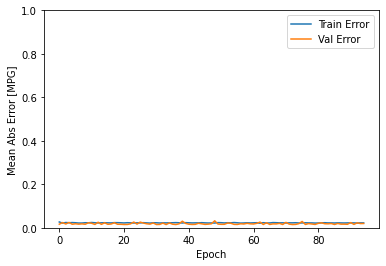

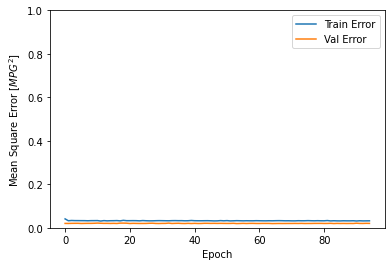

In [21]:
# vemos como se regula el modelo evitando el sobreajuste

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [22]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[0.00869343],
       [0.00869343],
       [0.00869343],
       ...,
       [0.00869343],
       [0.00869343],
       [0.00869343]], dtype=float32)

In [23]:
print('Precisión del modelo usando el MSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando el MSE):
0.019420160751602255


In [ ]:
#Veamos como se comporta el modelo con CV y con hiperparametros obtenidos de GriSearchCV 
   
    # To start from scratch
keras.backend.clear_session()
#Luego de tener un modelo con regularización es conveniente usar un CV y tener un mse para ver como se comporta con datos que nunca observo.
regressor = KerasRegressor(build_fn = define_model, batch_size = 32, epochs = 58)
errores = cross_val_score(regressor, x_test, y_test, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)
errores = -errores
errores

In [ ]:
#Un MSE promedio parecido al obtenido con early, no se observa mucha varianza en los 5 errores del CV
print(errores.mean(), errores.std())

**Esta parte es opcional, ya que se construye una grilla para saber que hiperparametros pueden ser mejores, pero consume al menos 1 hora.**

In [ ]:
def define_model(optimizer,activation):
    keras.backend.clear_session()
    
    model = keras.models.Sequential()

    # Input layer
    model.add(keras.layers.Flatten(input_dim=8))
    

    # Two hidden layers with 32 units each
    model.add(keras.layers.Dense(64, kernel_initializer='normal', activation='relu'))
    
               
    model.add(keras.layers.Dense(32, kernel_initializer='normal', activation='relu'))
   
    model.add(keras.layers.Dense(16, kernel_initializer='normal', activation='relu'))
    

    # Output layer. As this is a multi-class classification problem, use K (here 10) units.
    model.add(keras.layers.Dense(1, input_dim=8,kernel_initializer='normal', activation='relu'))
    model.compile(loss='mse', metrics=['mse', 'mae'], optimizer=optimizer)

   
    return model


In [ ]:
keras.backend.clear_session()

In [ ]:

regressor = KerasRegressor(build_fn = define_model)


In [ ]:
parameters= {"batch_size": [25,32], "epochs":[100,200], "optimizer":["Adam", "rmsprop"], "activation":["relu","linear"]}

In [ ]:
grilla = GridSearchCV(estimator=regressor, param_grid= parameters,scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
                      
                      
grilla.fit(x_train,y_train)

In [ ]:
grilla.best_params_

In [ ]:
grilla.best_score_

In [ ]:
# Fit best model
modelo=grilla.best_estimator_


In [ ]:

#se puede usar scoring='neg_root_mean_squared_error' tambien que seria la raiz
MSE_modelo=cross_val_score(modelo,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
errores = -MSE_modelo
MSE_modelo

In [ ]:
print(errores.mean(), errores.std())

Ahora se prueba con un set de datos final de la materia

In [24]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresiones_TP_UNSAM/main/base_datos_estaciones_met_V3_test.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [25]:
x= df[[ 'PP_Las Varas AgriculturaCba', 'PP_San Miguel - Establecimiento Don Luis',
        'PP_ San Miguel - Las Varillas']]
y= df["PP_Alicia AgriculturaCba"]

In [26]:
keras.backend.clear_session()

In [27]:
#Estandarizo las features, las redes son muy sensibles a datos no escalados.
scaler_labels = StandardScaler()
x = scaler_labels.fit_transform(x)


In [34]:
y_p = model.predict(x)
y_p

array([[0.00091707],
       [0.00091707],
       [0.00091707],
       ...,
       [0.00091707],
       [0.00091708],
       [0.00091708]], dtype=float32)

In [35]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2587    0.0
2588    0.0
2589    0.0
2590    0.0
2591    0.0
Name: PP_Alicia AgriculturaCba, Length: 2592, dtype: float64

In [31]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y,y_p,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.03740690628818065


In [39]:
data_predicha = pd.DataFrame(y_p)

In [38]:
data_test = pd.DataFrame(y)

In [41]:

result = pd.concat([data_predicha, data_test], axis=1)

In [46]:
result.to_csv("comparacion.csv")

In [47]:
from google.colab import files

files.download('comparacion.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>